## Functions of a random variable

Given a random variable $x$ with probability density function $p_x(x)$ and a function $f$, consider the quantity:
$$y = f(x)$$
Clearly $y$ is a random variable with some probability density function $p_y(y)$. If $f$ is invertible, then we can write:
$$p_y(y) = p_x(f^{-1}(y))$$
That is, if there is one and only one input $x$ that results in the output $y$, then the probability of obtaining $y$ is simply the probability of inputting $x$. In general $f$ may not be injective, meaning multiple $x$ values are mapped to the same $y$ value. We can still talk about the *preimage* of $y$ though, which is the set of all $x$ which are mapped to $y$ (written $\{x: f(x)=y\}$). For a function which is not necessarily invertible, we can write:
$$p_y(y) = \sum_{\{x: f(x) = y\}} p_x(x)$$

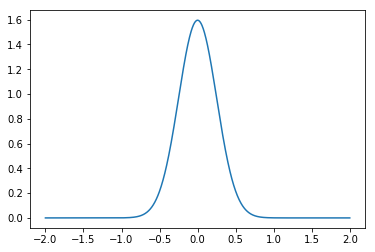

In [192]:
from matplotlib import pyplot
import numpy as np

def normal_1d(x, mu=1, sigma=1):
    normalization = 1/(sigma * np.sqrt(2*np.pi))
    pdf = np.exp(-0.5*((x-mu)/sigma)**2)
    return normalization * pdf

x = np.linspace(-2, 2, 1000)
px = normal_1d(x, 0, 0.25)
plt.plot(x,px)
plt.show()

In [187]:
y = 4-x**2

plt.plot()

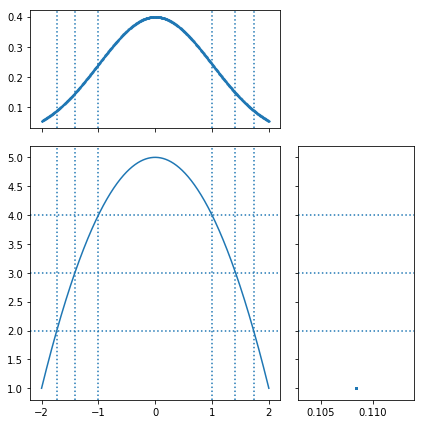

In [183]:
def plot_pdfs(p_x, f, x_range=(0,10), y_ref=[]):
    f = np.vectorize(f)
    fig = plt.figure(figsize=(6,6))
    ax_f = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
    ax_x = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax_y = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
    ax_x.tick_params(labelbottom=False)
    ax_y.tick_params(labelleft=False)
    x_domain = np.linspace(x_range[0], x_range[1], 1000)
    y_domain = np.linspace(f(x_range[0]), f(x_range[1]), 1000)

    p_y = [np.sum([p_x(xci) for xci in get_crossings(f,x_domain,y)]
                    ) for y in y_domain]
    
    ax_x.scatter(x_domain, p_x(x_domain),s=1)
    ax_y.scatter(p_y,y_domain,s=1)
    ax_f.plot(x_domain, f(x_domain))
    ax_x.set_xlim(ax_f.get_xlim())
    ax_y.set_ylim(ax_f.get_ylim())
    
    for yi in y_ref:
        ax_y.axhline(yi,linestyle=':')
        ax_f.axhline(yi,linestyle=':')
        xc = get_crossings(f, x_domain, yi)
        for xci in xc:
            ax_x.axvline(xci,linestyle=':')
            ax_f.axvline(xci,linestyle=':')


    plt.tight_layout()
    plt.show()
    
p_x = lambda x: normal_1d(x, 0, 1)
f = lambda x: 5 - x**2
plot_pdfs(p_x, f, x_range=(-2,2),y_ref=[2,3,4])


There is another